<a href="https://colab.research.google.com/github/Rishabh786Singh/CNN_with_keras/blob/master/CIFAR10__USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing important libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [0]:
#loading dataset
from keras.datasets import cifar10
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()

In [0]:
print("Shape training dataset_X :  ",train_X.shape)
print("Shape training dataset_Y : ",train_Y.shape)

Shape training dataset_X :   (50000, 32, 32, 3)
Shape training dataset_Y :  (50000, 1)


In [0]:
#lets's check out how many unique classes present there in our data set
classes=np.unique(train_Y)
print("uniques classes are : ",classes)

uniques classes are :  [0 1 2 3 4 5 6 7 8 9]


In [0]:

#now we are just converting all things in float32 and applying maximum value normalization
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [0]:
#Now we are going to perform one_hot encoding using keras
from keras.utils import to_categorical
train_Y_onehot=to_categorical(train_Y)
test_Y_onehot=to_categorical(test_Y)

In [0]:
print("Original_value : ", train_Y[5])
print("One_hot_encoded_value : " ,train_Y_onehot[5])

Original_value :  [1]
One_hot_encoded_value :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_x,valid_x,train_y,valid_y=train_test_split(train_X,train_Y_onehot,test_size=0.2)

In [0]:
#last time check the shape
train_x.shape,valid_x.shape,train_y.shape,valid_y.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [0]:
#important stuff for modelling
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 512
epochs = 20
num_classes = 10

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(64,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(Conv2D(128,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(256,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(Conv2D(256,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(512,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(Conv2D(512,kernel_size=3,activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(8192,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8192,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 256)         295168    
__________

In [0]:
cifar_train = model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_x, valid_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 25s 628us/step - loss: 2.3079 - acc: 0.0983 - val_loss: 2.3027 - val_acc: 0.1013
Epoch 2/20
40000/40000 [==============================] - 20s 504us/step - loss: 2.3012 - acc: 0.1013 - val_loss: 2.2830 - val_acc: 0.1243
Epoch 3/20
40000/40000 [==============================] - 20s 495us/step - loss: 2.0268 - acc: 0.2021 - val_loss: 1.8080 - val_acc: 0.2976
Epoch 4/20
40000/40000 [==============================] - 19s 487us/step - loss: 1.6693 - acc: 0.3513 - val_loss: 1.5687 - val_acc: 0.3953
Epoch 5/20
40000/40000 [==============================] - 20s 488us/step - loss: 1.4671 - acc: 0.4467 - val_loss: 1.3553 - val_acc: 0.4944
Epoch 6/20
40000/40000 [==============================] - 20s 492us/step - loss: 1.2770 - acc: 0.5302 - val_loss: 1.1811 - val_acc: 0.5661
Epoch 7/20
40000/40000 [==============================] - 20s 493us/step - loss: 1.1060 - acc: 0.5951 - val_loss: 1.

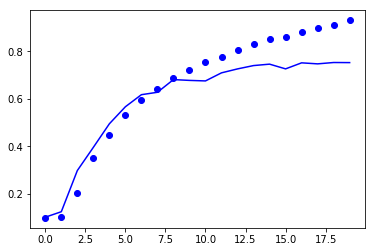

In [0]:
#let's visualize this outcomes
accuracy = cifar_train.history['acc']
val_accuracy = cifar_train.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

We clearly see that after 10 epochs overfitting happen

In [0]:
#now we are going to evaluate this on our testing dataset
evaluation=model.evaluate(test_X,test_Y_onehot)

10000/10000 [==============================] - 3s 263us/step


In [0]:
print('Test loss:', evaluation[0])
print('Test accuracy:', evaluation[1])

Test loss: 1.0366777983665467
Test accuracy: 0.7452


In [0]:
#it means that on unseen dataset it gives around 74% accuracy